# Instituto Tecnológico de Durango

# Inteligencia Artificial

## Practica 3 COVID-19

### Jose Gabriel Rodriguez Rivas

### Juan Manuel Saracho Figueroa

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
data = pd.read_csv("covid.csv",encoding = "ISO-8859-1")
data["FECHA_DEF"] = data["FECHA_DEF"].apply(lambda toLabel: 0 if toLabel == '9999-99-99' else 1)
training, testing = train_test_split(data, test_size = 0.30)

In [2]:
y_target = training["FECHA_DEF"].values
columns = ["UCI", "INTUBADO", "NEUMONIA","EDAD","SEXO","DIABETES","EPOC","ASMA","INMUSUPR", "HIPERTENSION","CARDIOVASCULAR","OBESIDAD","RENAL_CRONICA","TABAQUISMO","EMBARAZO"]
X_input = training[list(columns)].values

In [3]:
from sklearn import tree

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf_train = clf_train.fit(X_input, y_target)
clf_train.score(X_input,y_target)

0.9434357870802712

In [4]:
with open("covid.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

In [5]:
!dot -Tpng covid.dot -o covid.png

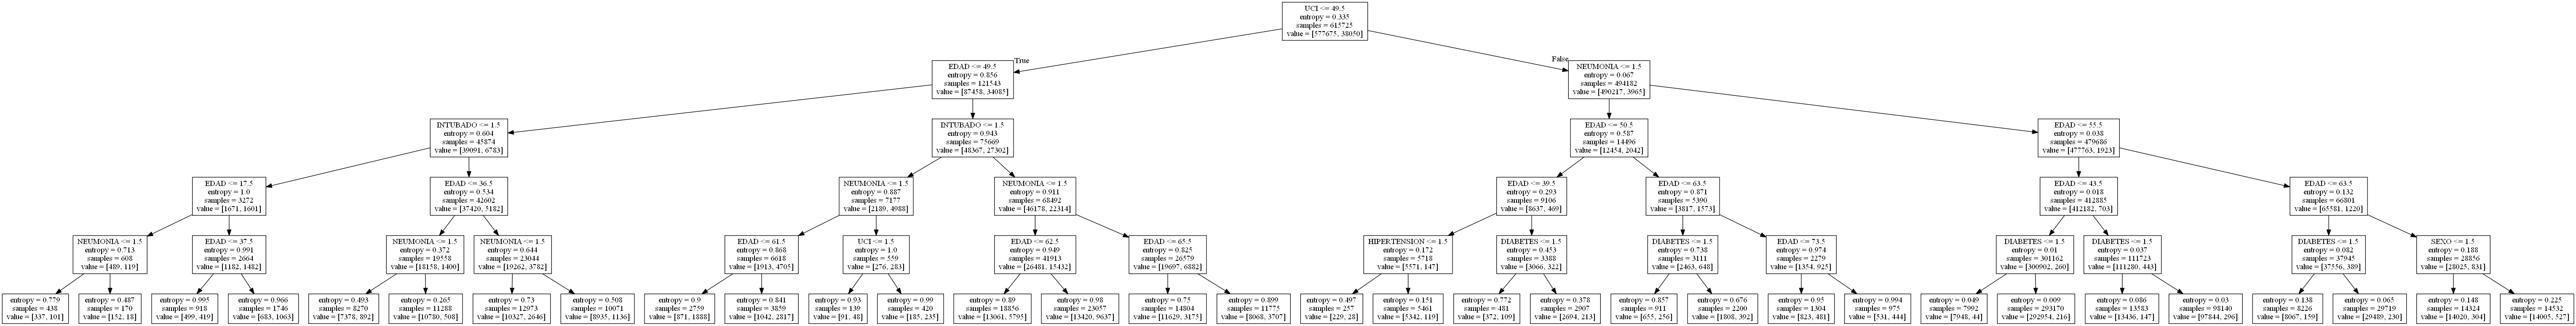

In [6]:
from IPython.display import Image
Image("covid.png")

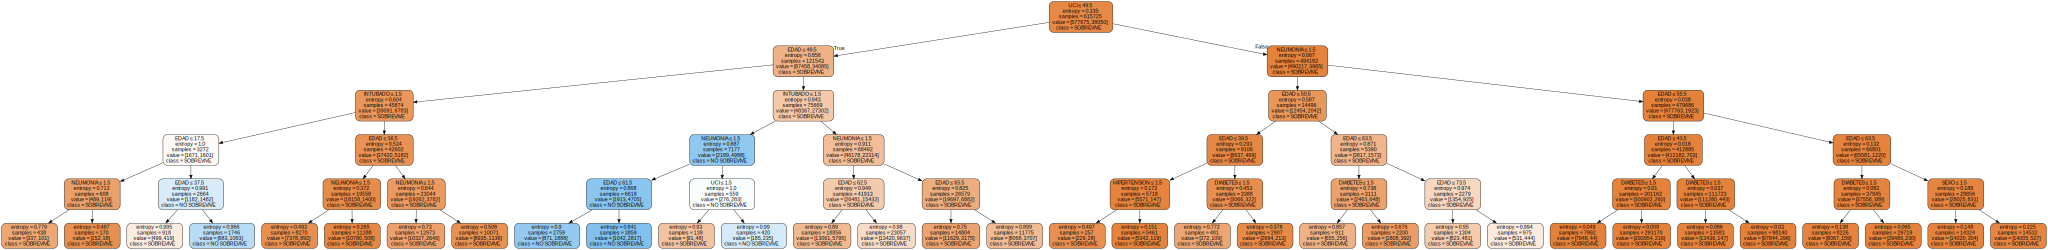

In [7]:
clasificacion=['SOBREVIVE','NO SOBREVIVE']
import sklearn
with open("covid.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)
import graphviz
dot_data= tree.export_graphviz(clf_train,out_file=None,
                               class_names=clasificacion,
                              feature_names=columns, filled=True,
                              rounded=True, special_characters=True)
graph= graphviz.Source(dot_data)
graph.render("covidColor", format='png')
graph

In [8]:
X_input = testing[list(columns)].values

target_labels = clf_train.predict(X_input)
target_labels = pd.DataFrame({'Est_Survival':target_labels,'ID_REGISTRO':testing['ID_REGISTRO']})
target_labels

,Est_Survival,ID_REGISTRO
162177,0,0ea5b2
360179,0,07728a
25340,0,0d558c
49432,0,76702
470301,0,0ad4a2
...,...,...
484070,0,100cd0
121552,0,1c4e27
35760,0,07a1d0
804801,0,165f89


In [9]:
import numpy as np

testing_results = pd.merge(target_labels, data[['ID_REGISTRO','FECHA_DEF']], on=['ID_REGISTRO'])
acc = np.sum(testing_results['Est_Survival'] == testing_results['FECHA_DEF']) / float(len(testing_results))
acc

0.9396559272290954

In [10]:
from sklearn.model_selection import train_test_split

X = data[list(columns)].values
y = data["FECHA_DEF"].values

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=0)
type(X_train)

numpy.ndarray

In [11]:
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf_train = clf_train.fit(X_train, y_train)

In [12]:
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.9433188517601202 Testing score = 0.9430543081592979


## Sin variables extras

In [13]:
y_target2 = training["FECHA_DEF"].values
columns2 = ["EDAD","SEXO","DIABETES","EPOC","ASMA","INMUSUPR", "HIPERTENSION","CARDIOVASCULAR","OBESIDAD","RENAL_CRONICA","TABAQUISMO","EMBARAZO"]
X_input2 = training[list(columns2)].values

In [14]:
clf_train2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

clf_train2 = clf_train.fit(X_input2, y_target2)
clf_train2.score(X_input2,y_target2)

0.9382029315035121

In [15]:
with open("covid2.dot", 'w') as f2:
  f2 = tree.export_graphviz(clf_train2, out_file=f, feature_names=columns2)

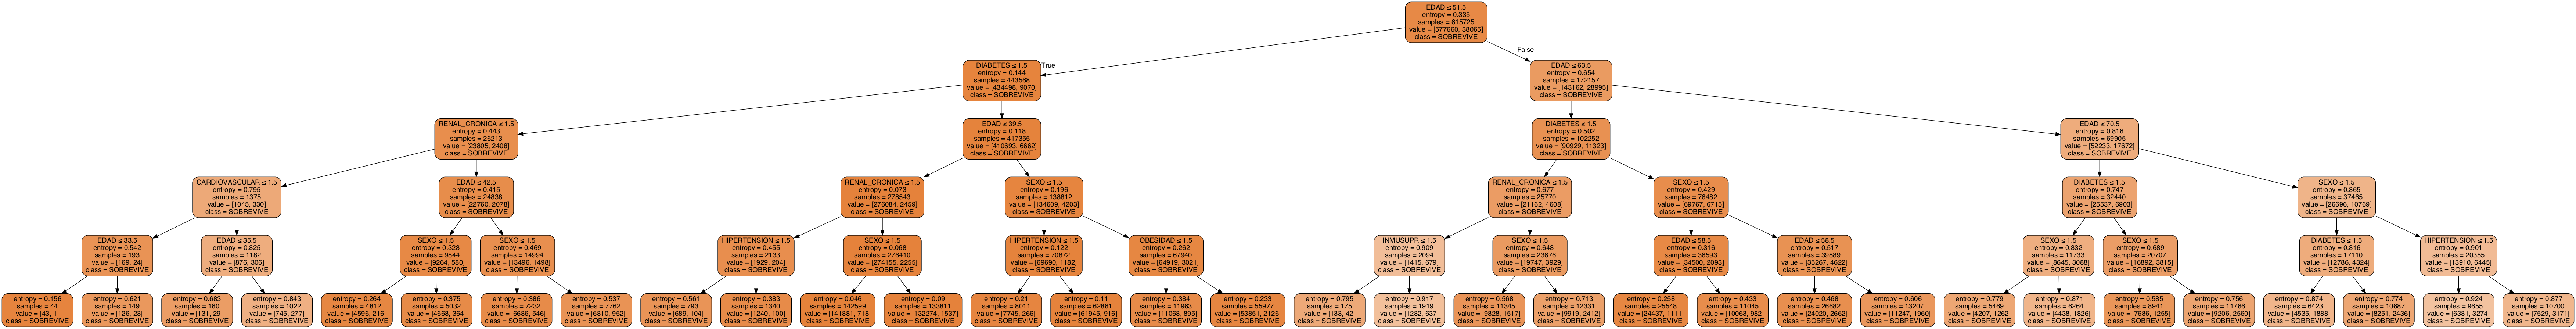

In [16]:
!dot -Tpng ./covid2.dot -o ./Data/covid2.png
from IPython.display import Image

Image("covid2.png")

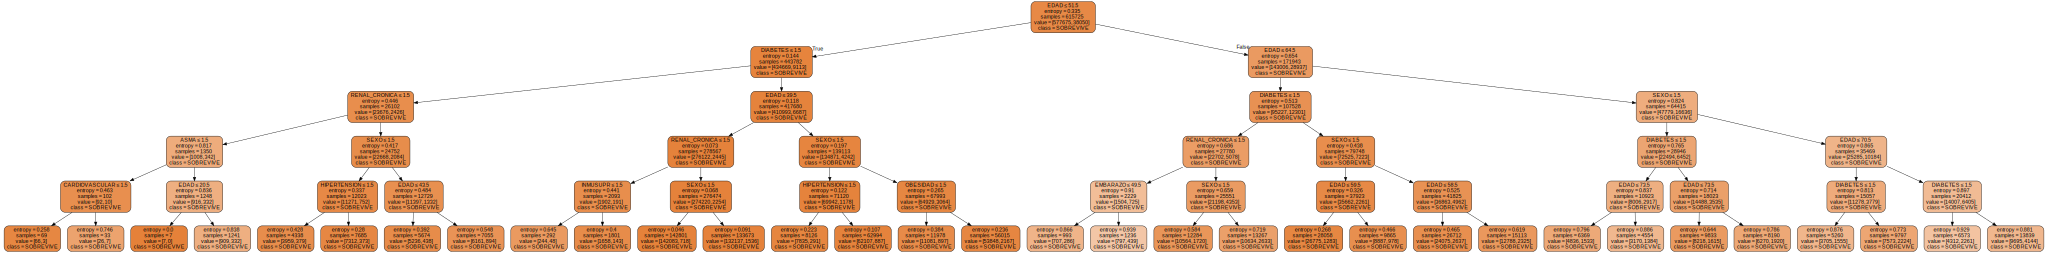

In [17]:
clasificacion=['SOBREVIVE','NO SOBREVIVE']
import sklearn
with open("covid2.dot", 'w') as f:
  f = tree.export_graphviz(clf_train2, out_file=f, feature_names=columns2, class_names=clasificacion)
import graphviz
dot_data= tree.export_graphviz(clf_train2,out_file=None,
                               class_names=clasificacion,
                              feature_names=columns2, filled=True,
                              rounded=True, special_characters=True)
graph= graphviz.Source(dot_data)
graph.render("covidColor2", format='png')
graph

In [20]:
from sklearn.model_selection import train_test_split

X2 = data[list(columns2)].values
y2 = data["FECHA_DEF"].values

X_train2,X_test2,y_train2,y_test2=train_test_split(X2, y2, test_size=0.30, random_state=0)

In [21]:
clf_train2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf_train2 = clf_train2.fit(X_train2, y_train2)
train_score2 = str(clf_train2.score(X_train2,y_train2))
test_score2 = str(clf_train2.score(X_test2,y_test2))

print('Training score = '+ train_score2+' Testing score = '+test_score2)

Training score = 0.9381558325551179 Testing score = 0.9381468302240008


## Conclusiones

#### Fue muy interesante realizar esta práctica, ya que nos da una amplia perspectiva con todas las posibles situaciones que se pueden presentar cuando una persona es infectada con el virus del covid-19. Sin duda, si la gente se diera el tiempo de acceder y analizar esta información la pesarían 2 veces a la hora de salir a la calle sin protección de ningún tipo.

#### Analizando ambas corridas nos damos cuenta de que la primera fue la más preciza, ya que esta involucra más factores a la hora de analizar los datos. Las variables de Neumonía, UCI e Intuvado tienen un gran peso dentro de nuestro dataset y son determinantes a la hora de analizar si una persona vive o muere si cae dentro de alguna de estas circunstancias.

